# 航空写真の取得．

COWCの航空写真のデータを下記の記事を参考に入手する

[Deep Learning で航空写真から自動車をカウントする](https://qiita.com/motokimura/items/d155d532a5f1dd02089c)
[MIT_LICENSE](https://github.com/motokimura/cowc_car_counting/blob/master/LICENSE)


In [3]:
!ls

data  scr


In [4]:
!git clone https://github.com/motokimura/cowc_car_counting.git

Cloning into 'cowc_car_counting'...
remote: Enumerating objects: 577, done.
remote: Total 577 (delta 0), reused 0 (delta 0), pack-reused 577
Receiving objects: 100% (577/577), 31.61 MiB | 7.19 MiB/s, done.
Resolving deltas: 100% (298/298), done.


In [ ]:
#COWCのサイトよりデータをダウンロードする．

%cd cowc_car_counting/src/data
!bash download_cowc.sh

gen_train_val_crops.pyを実行し，trainとvalの画像データの分割，および同じ位置のアノテーションデータとの結合処理を行う．

In [6]:
import argparse
import os
import shutil
import math
import numpy as np
from PIL import Image
from skimage import io
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np

import cv2


Image.MAX_IMAGE_PIXELS = 1000000000

In [ ]:
%cd ../features

In [18]:
!python gen_train_val_crops.py

Loading Columbus_CSUAV_AFRL/EO_Run01_s2_301_15_00_31.99319028-Oct-2007_11-00-31.993_Frame_1-124% ... (1/23)
100%|█████████████████████████████████████████| 804/804 [00:08<00:00, 99.41it/s]
Loading Columbus_CSUAV_AFRL/EO_Run01_s2_301_15_00_42.40561128-Oct-2007_11-00-47.194_Frame_74-124% ... (2/23)
100%|███████████████████████████████████████| 1159/1159 [00:11<00:00, 98.98it/s]
Loading Columbus_CSUAV_AFRL/EO_Run01_s2_301_15_00_52.82681728-Oct-2007_11-01-01.775_Frame_144-124% ... (3/23)
100%|███████████████████████████████████████| 1998/1998 [00:20<00:00, 96.28it/s]
Loading Potsdam_ISPRS/top_potsdam_2_10_RGB ... (4/23)
100%|████████████████████████████████████████| 280/280 [00:01<00:00, 201.82it/s]
Loading Potsdam_ISPRS/top_potsdam_2_11_RGB ... (5/23)
100%|████████████████████████████████████████| 247/247 [00:01<00:00, 189.82it/s]
Loading Potsdam_ISPRS/top_potsdam_2_12_RGB ... (6/23)
100%|████████████████████████████████████████| 262/262 [00:01<00:00, 215.69it/s]
Loading Potsdam_ISPRS/top

In [22]:
train_path = '../../data/cowc_processed/train_val/crop/train/'
files =os.listdir(train_path)

#ファイル名の取得
print(files[0])

03747_1678_9147.png


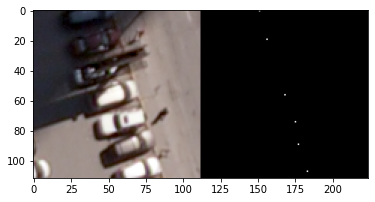

In [42]:
#trainファイルの読み込み．

im = cv2.imread(train_path + files[0])
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

左に撮像画像，右に対向するアノテートされた車のポイント画像．

In [28]:
#画像サイズの確認
v_size = im_rgb.shape[0]
h_size = im_rgb.shape[1]
print(h_size)

224


In [29]:
#　画像を左の撮像と右のアノテーション画像に分割する．

clp_l = im_rgb[0:v_size, 0:h_size//2]
clp_r = im_rgb[0:v_size, h_size//2:h_size]

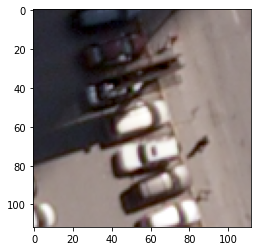

In [30]:
#　撮像画像の確認
plt.imshow(clp_l)

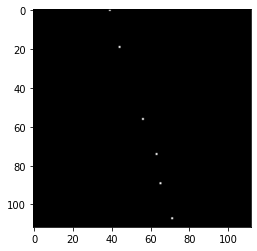

In [31]:
#アノテーション画像の確認
plt.imshow(clp_r)

In [36]:
#アノテーション画像の積算値より車の台数を算出．（1台:765)

car_count = int(np.sum(clp_r) // 765)
print('車の台数: ', car_count)

車の台数:  6


In [39]:
#学習および検証用データの作成

path = '../../../data/'

if not os.path.exists(path ):
    os.mkdir(path )

In [40]:
path_train = '../../../data/train/'

if not os.path.exists(path_train):
    os.mkdir(path_train)

In [41]:
path_val = '../../../data/val/'

if not os.path.exists(path_val):
    os.mkdir(path_val)

In [43]:
for i in range(len(files)):
    train_path = '../../data/cowc_processed/train_val/crop/train/'
    files =os.listdir(train_path)

    #ファイル名の取得
    #print(files[0])
    
    im = cv2.imread(train_path + files[i])
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    
    
    #画像サイズの確認
    v_size = im_rgb.shape[0]
    h_size = im_rgb.shape[1]

    clp_l = im_rgb[0:v_size, 0:h_size//2]
    clp_r = im_rgb[0:v_size, h_size//2:h_size]

    car_count = int(np.sum(clp_r) // 765)
    car_count
    #rint(car_count)

    path_train = '../../../data/train/'

    #保存先のディレクトリがなければ作成
    if not os.path.exists(path_train + str(car_count)):
        os.mkdir(path_train + str(car_count))
    #print(path + str(car_count))

    #分離した画像の保存
    Image.fromarray(clp_l).save(path_train + str(car_count) +'/' + files[i])
    #print(path + str(car_count) +'/' + files[0])

In [45]:
#trainデータ数
print('Trainの台数分布: ', len(os.listdir(path_train)))

Trainの台数分布:  21


In [49]:
#trainデータ数
import glob

print('Trainのデータ数: ', len(glob.glob(path_train + '/*/*')))

Trainのデータ数:  37981


In [53]:
!pwd

/home/shirokawakita/Shiro/cowc_car_counting/qiita/cowc_car_counting/src/features


In [54]:
val_path = '../../data/cowc_processed/train_val/crop/val/'
files =os.listdir(val_path)


for i in range(len(files)):

    #ファイル名の取得
    #print(files[0])
    
    im = cv2.imread(val_path + files[i])
    im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    
    
    #画像サイズの確認
    v_size = im_rgb.shape[0]
    h_size = im_rgb.shape[1]

    clp_l = im_rgb[0:v_size, 0:h_size//2]
    clp_r = im_rgb[0:v_size, h_size//2:h_size]

    car_count = int(np.sum(clp_r) // 765)
    car_count
    #rint(car_count)

    path_val = '../../../data/val/'

    #保存先のディレクトリがなければ作成
    if not os.path.exists(path_val + str(car_count)):
        os.mkdir(path_val + str(car_count))
    #print(path + str(car_count))

    #分離した画像の保存
    Image.fromarray(clp_l).save(path_val + str(car_count) +'/' + files[i])
    #print(path + str(car_count) +'/' + files[0])

In [55]:
#valデータ数
print('valの台数分布: ', len(os.listdir(path_val)))

valの台数分布:  13


In [56]:
#trainデータ数
print('Valのデータ数: ', len(glob.glob(path_val + '/*/*')))

Valのデータ数:  10267


In [ ]:
!pwd

In [ ]:
%cd ../../../data

In [70]:
import shutil
import glob
import os

def move_glob(dst_path, pathname, recursive=True):
    for p in glob.glob(pathname, recursive=recursive):
        shutil.move(p, dst_path)

Valデータの最大台数が12台なため，Trainの12台以上の台数はすべて12とする．

In [71]:
for i in range(13, 21, 1):
    move_glob('./train/12/', './train/' + str(i) + '/*.png')

In [75]:
#ディレクトリ名を2桁に変更する．

for i in range(0,10,1):
    os.rename('./train/'+ str(i), './train/0' + str(i))
    os.rename('./val/'+ str(i), './val/0' + str(i))